In [20]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 10 
np.set_printoptions(suppress=True)

In this assignment we will revisit an old friend, the traveling salesman problem (TSP). This week you will implement a heuristic for the TSP, rather than an exact algorithm, and as a result will be able to handle much larger problem sizes. Here is a data file describing a TSP instance (original source: http://www.math.uwaterloo.ca/tsp/world/bm33708.tsp).

The first line indicates the number of cities. Each city is a point in the plane, and each subsequent line indicates the x- and y-coordinates of a single city.

The distance between two cities is defined as the Euclidean distance --- that is, two cities at locations The distance between two cities is defined as the Euclidean distance --- that is, two cities at locations $(x,y)$ and 
$(z,w)$ have distance $\sqrt{(x−z)^{2} + (y−w)^{2}}$ between them.

You should implement the nearest neighbor heuristic:

<ol>
<li> Start the tour at the first city. </li>
<li> Repeatedly visit the closest city that the tour hasn't visited yet. In case of a tie, go to the closest city with the lowest index. For example, if both the third and fifth cities have the same distance from the first city (and are closer than any other city), then the tour should begin by going from the first city to the third city. </li>
<li> Once every city has been visited exactly once, return to the first city to complete the tour.
In the box below, enter the cost of the traveling salesman tour computed by the nearest neighbor heuristic for this instance, rounded down to the nearest integer. </li>
</ol>

[Hint: when constructing the tour, you might find it simpler to work with squared Euclidean distances (i.e., the formula above but without the square root) than Euclidean distances. But don't forget to report the length of the tour in terms of standard Euclidean distance.]


In [21]:
def read_input(filename):
    first = True
    counter = 0 
    with open('week15_file/'+filename) as f:
        for line in f:
            line = line.split() # to deal with blank 
            if line and not first:            # lines (ie skip them)
                x = float(line[0])
                y = float(line[1])
                TSP_instance[counter,0] = x
                TSP_instance[counter,1] = y
                counter+=1
            else:
                num_cities = int(line[0])
                TSP_instance = np.zeros((num_cities,2))
                first = False
                
    return TSP_instance,num_cities

In [31]:
def travelling_salesman_problem_nn(filename,sorted_x=None):
    first = True
    counter = 0 
    with open('week15_file/'+filename) as f:
        for line in f:
            line = line.split() # to deal with blank 
            if line and not first:            # lines (ie skip them)
                city_index = int(line[0])-1 #to start from 0
                x = float(line[1])
                y = float(line[2])
                TSP_instance[counter,0] = city_index
                TSP_instance[counter,1] = x
                TSP_instance[counter,2] = y
                counter+=1
            else:
                num_cities = int(line[0])
                TSP_instance = np.zeros((num_cities,3))
                first = False
    
    #print(num_cities)
    #Sort the x coordinate to speed up the algorithm
    if sorted_x == None:
        sort_idx = np.argsort(TSP_instance[:,1])
    else:
        sort_idx = list(range(num_cities))
 
    #Start the tour at the first city.
    path = [0]
    path_dist = []
    need_to_visit = list(sort_idx)
    #counter = 0 
    while len(path) != (num_cities+1):
        #print(counter)
        #counter +=1
        dists = []
        min_dist = np.inf
        min_destination_idx = -1
        #Repeatedly visit the closest city that the tour hasn't visited yet.
        for destination_idx in need_to_visit:
            #Once every city has been visited exactly once, return to the first city to complete the tour.
            if len(need_to_visit) >1 and destination_idx == 0:
                continue
            source_idx = path[-1]
  
            x = TSP_instance[source_idx,1]
            y = TSP_instance[source_idx,2]
            z = TSP_instance[destination_idx,1]
            w = TSP_instance[destination_idx,2]
            
            dist_x = (x-z)**2
            #Since the coordinate is already sorted in increasing value of x, if the distance in x is already larger
            #than the min_dist, we do not need to continue the iteration since the distance in x is always increasing.
            if dist_x > min_dist:
                break
            
            dist_y = (y-w)**2
            dist = dist_x+dist_y
            #In case of a tie, go to the closest city with the lowest index.
            #For example, if both the third and fifth cities have the same distance from the first city 
            #(and are closer than any other city), then the tour should begin by going from the first city
            #to the third city.
            if dist < min_dist:
                min_dist = dist
                min_destination_idx = destination_idx
            elif dist == min_dist:
                if destination_idx < min_destination_idx:
                    min_destination_idx = destination_idx

        need_to_visit.remove(min_destination_idx)
        path.append(min_destination_idx)
        path_dist.append(np.sqrt(min_dist))
        
    return path,np.sum(path_dist)
    



In [32]:
start_time = time.time()
print(travelling_salesman_problem_nn('week15_test1.txt')) #Path: 0 2 1 4 5 3 0 TSP:15.2361
print("--- %s seconds ---" % (time.time() - start_time))

([0, 2, 1, 4, 5, 3, 0], 15.23606797749979)
--- 0.004683017730712891 seconds ---


In [33]:
start_time = time.time()
print(travelling_salesman_problem_nn('week15_test2.txt')) #TSP:74
print("--- %s seconds ---" % (time.time() - start_time))

([0, 15, 9, 13, 14, 6, 12, 8, 10, 4, 11, 5, 1, 7, 18, 19, 16, 2, 3, 17, 0], 74.68953984676908)
--- 0.0053708553314208984 seconds ---


In [34]:
start_time = time.time()
print(travelling_salesman_problem_nn('week15_test3.txt',True)) #TSP:2470
print("--- %s seconds ---" % (time.time() - start_time))

([0, 2, 1, 4, 5, 6, 8, 10, 9, 11, 12, 7, 3, 14, 13, 16, 15, 17, 18, 20, 22, 24, 26, 28, 31, 34, 36, 37, 38, 40, 42, 45, 46, 49, 41, 32, 25, 23, 21, 19, 27, 30, 29, 33, 35, 39, 43, 44, 47, 48, 0], 2470.1601377370102)
--- 0.010682821273803711 seconds ---


In [35]:
start_time = time.time()
print(travelling_salesman_problem_nn('week15_test4.txt',True)) #TSP:48581
print("--- %s seconds ---" % (time.time() - start_time))

([0, 2, 1, 4, 5, 6, 8, 10, 9, 11, 12, 7, 3, 14, 13, 16, 15, 17, 18, 20, 22, 24, 26, 28, 31, 34, 36, 37, 38, 40, 42, 45, 46, 50, 49, 55, 41, 32, 25, 23, 21, 19, 27, 30, 29, 33, 35, 39, 43, 44, 47, 48, 52, 54, 56, 57, 58, 53, 51, 61, 63, 65, 69, 73, 72, 74, 77, 79, 80, 78, 75, 76, 81, 83, 85, 84, 87, 90, 94, 97, 101, 100, 99, 103, 107, 112, 114, 115, 119, 124, 120, 131, 138, 141, 144, 147, 156, 164, 169, 170, 165, 159, 184, 192, 197, 196, 189, 183, 182, 187, 191, 200, 205, 207, 219, 223, 222, 214, 201, 193, 175, 168, 177, 181, 180, 186, 179, 174, 163, 155, 146, 134, 143, 151, 162, 167, 173, 185, 188, 178, 172, 158, 199, 211, 195, 231, 239, 244, 253, 258, 265, 303, 316, 338, 367, 377, 409, 419, 426, 434, 445, 458, 474, 492, 483, 457, 451, 444, 433, 425, 417, 418, 390, 385, 410, 391, 420, 427, 441, 446, 452, 465, 486, 493, 459, 442, 435, 421, 411, 399, 392, 386, 378, 379, 369, 356, 352, 340, 341, 330, 317, 318, 311, 305, 304, 299, 310, 329, 357, 370, 371, 381, 380, 387, 393, 403, 404, 415,

In [37]:
start_time = time.time()
print(travelling_salesman_problem_nn('week15.txt',True)) #TSP:1203406.5012708139
print("--- %s seconds ---" % (time.time() - start_time))

([0, 2, 1, 4, 5, 6, 8, 10, 9, 11, 12, 7, 3, 14, 13, 16, 15, 17, 18, 20, 22, 24, 26, 28, 31, 34, 36, 37, 38, 40, 42, 45, 46, 50, 49, 55, 41, 32, 25, 23, 21, 19, 27, 30, 29, 33, 35, 39, 43, 44, 47, 48, 52, 54, 56, 57, 58, 53, 51, 61, 63, 65, 69, 73, 72, 74, 77, 79, 80, 78, 75, 76, 81, 83, 85, 84, 87, 90, 94, 97, 101, 100, 99, 103, 107, 112, 114, 115, 119, 124, 120, 131, 138, 141, 144, 147, 156, 164, 169, 170, 165, 159, 184, 192, 197, 196, 189, 183, 182, 187, 191, 200, 205, 207, 219, 223, 222, 214, 201, 193, 175, 168, 177, 181, 180, 186, 179, 174, 163, 155, 146, 134, 143, 151, 162, 167, 173, 185, 188, 178, 172, 158, 199, 211, 195, 231, 239, 244, 253, 258, 265, 303, 316, 338, 367, 377, 409, 419, 426, 434, 445, 458, 474, 492, 483, 457, 451, 444, 433, 425, 417, 418, 390, 385, 410, 391, 420, 427, 441, 446, 452, 465, 486, 493, 459, 442, 435, 421, 411, 399, 392, 386, 378, 379, 369, 356, 352, 340, 341, 330, 317, 318, 311, 305, 304, 299, 310, 329, 357, 370, 371, 381, 380, 387, 393, 403, 404, 415,

In [30]:
a = [[-1,4],[3,-1],[-1,3]]
c,d = min(a)
print(c)
print(d)

-1
3


In [5]:
#The cities location in question
TSP_instance,num_cities= read_input('week15.txt')

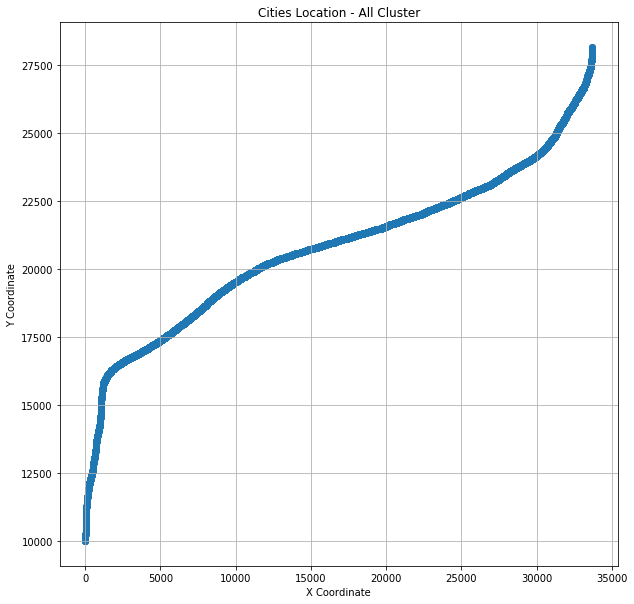

In [8]:
plt.title('Cities Location - All Cluster')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.scatter(TSP_instance[:,0],TSP_instance[:,1])
#for i in range(num_cities):
#     plt.text(TSP_instance[i,0],TSP_instance[i,1],str(i))
# all_cluster = [0,1,5,9,10,11,14,18,17,21,22,20,16,19,24,23,15,13,12,8,6,2,3,7,4,0]
# for i in range(len(all_cluster)-1):
#     plt.plot(TSP_instance[all_cluster[i:i+2],0],TSP_instance[all_cluster[i:i+2],1],'r-')